## Linear Regression

##### Regression 
* iki yada daha fazla nicel değişken arasındaki ilişkiyi (korelasyonu) ölçmek için kullanıla analiz metodudur. Burada Makine öğrenimi veriler arasındaki ilişkiyi belirlememize yardımcı olur ve bu sayede yeni veriler tahmin edilebilir.
* Tek değişkenle analiz yapılıyorsa tek değişkenli, birden çoksa çok değişkenli regresyon analizi denir.



##### Tek değişkenli regression;

Y = ax+ b 
* a -> Regresyon doğrusunun eğimi
* b -> Sabit değer (bias)

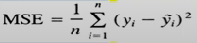

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
# sklearn kütüphanesi
from sklearn import linear_model

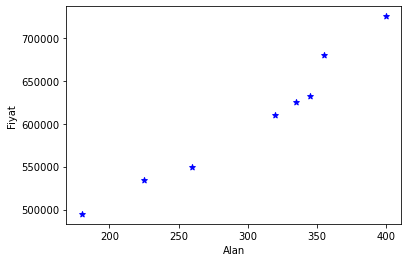

In [2]:
df= pd.read_csv("fiyat_linear_reg.csv")
plt.xlabel("Alan")
plt.ylabel("Fiyat")
plt.scatter(df.alan, df.fiyat, color='blue', marker='*')

In [3]:
df

,alan,fiyat
0,180,495000
1,225,535000
2,260,550000
3,320,610000
4,335,625000
5,345,632000
6,355,680000
7,400,725000


* Verilerle sistem beslendi - öğrendi

* reg değişkeni aslında bir linear regrosyon oluşturulan ve buna atanan bir değişkendir. Bu artık bu kümenin tahmin modelidir.


* linear_model -> sklearn kütüphanesinden import edilen özelliğiydi. LinearRegression ise bunun bir fonksiyonudur. 


* linear_model.LinearRegression() burada linear_model özelliği kullanılarak, LinearRegression fonksiyonuyla yaparak burada bir değişken oluşturuluyor. 

In [5]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

* reg.fit özelliğiyle veriler verilir.  

##### NOT
* Değerler girilirken önce x eksenindeki değerler verilir. Sonra y eksenindeki değerler verilir. 
* Yani aslında buradaki olay önce bağımsız (independent) değerler ardından bağımlı (dependent) değerler verilir.
* Burada bağımsız değişkenler için girdiğimiz değerin tek olmasının nedeni tekli regresyon yapılması. Birden fazla değişken de verilebilir.

* reg.fit kısmında bir dataFrame girilir. Bu yüzden çift parantez var. DataFrame yerine bir çift boyutlu dizi de girilebilir.

###### NOT : df['veri' ] şeklinde girildiğinde dataFrame tek bir sütun verir. Yani Series (seri).  Ancak çift parantez içerisinde veriler girilirse DataFrame döndürür.  

* reg.predict -> Öğretilen verilere göre yeni veri girerek bir sonuç alınmak için yapılan işlemde yeni veri predict ile girilir.

* reg.predict fonksiyonu da bir DataFrame alarak çalışır. veya iki boyutlu bir dizi,matris girilecek.  

In [7]:
reg.fit(df[['alan']], df['fiyat'])
reg.predict([[275]])

array([578633.33333333])

Bu kodlar sonrasında verilen metrekare değerine göre verilere bakılarak en uygun tahmini sonuç fiyat değerini hesapladı.

Bu işlemler aslında y= ax+b fonksiyonunu buluyor. 
buradaki a ve b değerleri öğrenilebilir. 


In [9]:
reg.coef_

array([1013.33333333])

Bu değer aslında bu fonksiyonun a değeri yani eğimidir.

In [10]:
reg.intercept_

299966.6666666666

Bu değer ise fonksiyonun b değeridir. 

Bu Fonksiyona göre işlemi biz yaparsak; 

In [11]:
# Y= ax + b 
a= reg.coef_
b=reg.intercept_
x= 275 # hesaplanması istenen değer
y= a*x +b 
y

array([578633.33333333])

Yukarıda hesaplanan değerle aynı değerleri verir. çünkü tüm olay bu formül üzerinden dönüyor.

Bu hesaplanan değerleri çizdirirsek; 

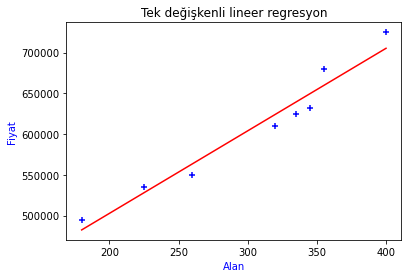

In [12]:
plt.xlabel("Alan", color="blue")
plt.ylabel("Fiyat", color="blue")
plt.title("Tek değişkenli lineer regresyon", color="black")
plt.scatter(df.alan, df.fiyat, color="blue", marker="+")
plt.plot(df.alan,reg.predict(df[['alan']]), color='red')

## Multiple Linear Regression

* En az iki tane independent(bağımsız) değişken var. ve dizin bu ikiden fazla olan bağımsız değişkene göre değişiyor. 


* Y= a + b1x1 + b2x2 + b3x3 +...


3 adet yeni veri için yapay zeka kullanarak tahmini satış fiyatını bulacağız.

1- 230 m2, 4 oda, 10 yaşında bina

2- 230 m2, 6 oda, 0 yaşında bina

3- 355 m2, 3 oda, 20 yaşında bina

In [13]:
df2= pd.read_csv("fiyat_multilinear_reg.csv")
df2

,alan,odasayisi,binayasi,fiyat
0,180,5,10,510000
1,225,4,18,508000
2,260,3,2,548000
3,320,6,10,650000
4,335,4,9,628000
5,345,5,14,632000
6,355,3,0,680000
7,400,4,10,725000


In [14]:
reg2=linear_model.LinearRegression()
reg2.fit(df2[["alan", "odasayisi","binayasi"]],df2["fiyat"])
reg2.predict([[230,4,10],[230,6,0],[355,3,20]])

array([530243.29284619, 586097.7833456 , 616657.45791365])

###### Fonksiyon kullanmadan hesaplamak; 


In [15]:
# Y= a + b1x1 + b2x2 + b3x3 +...
reg2.coef_

array([ 1018.99865454, 14893.82374984, -2606.68429997])

In [16]:
a= reg2.intercept_
a

262365.15030320536

In [17]:
b1= reg2.coef_[0]
b2= reg2.coef_[1]
b3= reg2.coef_[2]
x1=230
x2=4
x3=10
y= a+ b1*x1 + b2*x2 + b3*x3
y

530243.292846188

Yeni verilen verilerden biri için formüle göre hazır fonksiyon kullanmadan hesaplandı.

### Veri setinde Eksik veri olsa

In [22]:
df3= pd.read_csv("fiyat_multilinear_reg-eksikveri.csv")
df3

,alan,odasayisi,binayasi,fiyat
0,180,5.0,10,510000
1,225,4.0,18,508000
2,260,3.0,2,548000
3,320,NaN,10,650000
4,335,4.0,9,628000
5,345,5.0,14,632000
6,355,3.0,0,680000
7,400,4.0,10,725000


* Öncelikle eksik veri halledilir. 

In [27]:
ort= df3.odasayisi.median()
ort

4.0

In [26]:
# tam sayı çıksa da bunu normalde matematiksel olarak yuvarlamak gerekebilir;


# import math 
# median_odasay= math.floor(df3.odasayisi.median())
# median_odasay

In [29]:
# eksik veriyi ortalamayla doldurursak;

df3.odasayisi= df3.odasayisi.fillna(ort)
df3

,alan,odasayisi,binayasi,fiyat
0,180,5.0,10,510000
1,225,4.0,18,508000
2,260,3.0,2,548000
3,320,4.0,10,650000
4,335,4.0,9,628000
5,345,5.0,14,632000
6,355,3.0,0,680000
7,400,4.0,10,725000


In [32]:
reg3=linear_model.LinearRegression()
reg3.fit(df3[['alan','odasayisi','binayasi']],df3['fiyat'])

LinearRegression()

In [34]:
reg3.coef_
# lineer regresyon formülünde bulunan x e bağlı değişkenler olan b lerdir bu değerler

array([ 1035.94880922, 15686.52428172, -2523.21383168])

In [35]:
reg.intercept_
# lineer regresyon formülünde bulunan sabit değişkendir. 

299966.6666666666

In [40]:
reg3.predict([[300,3,40],[250,4,5]])

array([513944.37664209, 566145.94457157])

### Örnek Uygulama

In [43]:
df4= pd.read_csv("linear_calisma_.csv")
df4

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


Buradaki kolonların verilerin anlamları: 
bu veri seti deneyime dayalı olarak burada bir form için işe alım verilerini içeren dosyadır.

* experience : deneyimi 
* test_score : yazılı sınav sonucu 10 üzerinden
* interview_score: 10 üzerinden mülakat puanı 
* salary: maaşlar

 
 
* ilk sütunda sayı anlamı taşıyan text verileri var bunun için pythonda bulunan
word to number modülü kullanılabilir.  word2number

In [47]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [48]:
df4= pd.read_csv("linear_calisma_.csv")
df4

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [49]:
df4.experience= df4.experience.fillna("zero")
df4

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [50]:
df4.experience= df4.experience.apply(w2n.word_to_num)
df4

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [52]:
median_test_score= math.floor(df4['test_score(out of 10)'].mean())
median_test_score

7

In [54]:
df4['test_score(out of 10)'] = df4['test_score(out of 10)'].fillna(median_test_score)
df4

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [55]:
reg4= linear_model.LinearRegression()
reg4.fit(df4[['experience','test_score(out of 10)',"interview_score(out of 10)"]],df4['salary($)'])


LinearRegression()

In [56]:
reg4.predict([[2,9,6]])

array([53713.86677124])

In [60]:
salary= math.floor(reg4.predict([[0,7,5]]))
salary

41279